In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19   #transfer learning model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = "D:/CAPSTONE PROJECT/KIDNEY DATASET/Train"
valid_path = "D:/CAPSTONE PROJECT/KIDNEY DATASET/Test"

In [3]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob("D:/CAPSTONE PROJECT/KIDNEY DATASET/Train/*")
folders

['D:/CAPSTONE PROJECT/KIDNEY DATASET/Train\\Normal',
 'D:/CAPSTONE PROJECT/KIDNEY DATASET/Train\\Stone',
 'D:/CAPSTONE PROJECT/KIDNEY DATASET/Train\\Tumour']

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/CAPSTONE PROJECT/KIDNEY DATASET/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1579 images belonging to 3 classes.


In [12]:
training_set

In [13]:
test_set = test_datagen.flow_from_directory('D:/CAPSTONE PROJECT/KIDNEY DATASET/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 341 images belonging to 3 classes.


In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [15]:
len(training_set)
len(test_set)

11

In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  #callbacks=[early_stop],verbose=True
)

C:\Users\Bhargavi\AppData\Local\Temp\ipykernel_3572\3741037365.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/3
50/50 [==============================] - 344s 7s/step - loss: 0.8030 - accuracy: 0.7543 - val_loss: 0.2408 - val_accuracy: 0.8944
Epoch 2/3
50/50 [==============================] - 390s 8s/step - loss: 0.0719 - accuracy: 0.9810 - val_loss: 0.0558 - val_accuracy: 1.0000
Epoch 3/3
50/50 [==============================] - 397s 8s/step - loss: 0.0369 - accuracy: 0.9949 - val_loss: 0.0291 - val_accuracy: 1.0000


In [17]:
y_pred = model.predict(test_set)

11/11 [==============================] - 63s 6s/step


1/1 [==============================] - 0s 186ms/step
[[0. 0. 1.]]
2


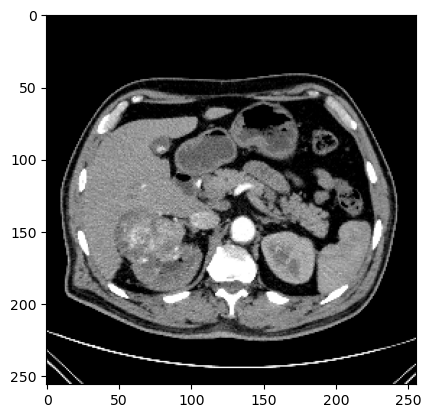

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img("D:/CAPSTONE PROJECT/KIDNEY DATASET/Test/Tumour/Tumor- (446).jpg", target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)

1/1 [==============================] - 0s 204ms/step
[[8.7611998e-32 1.0000000e+00 1.5675909e-21]]
1


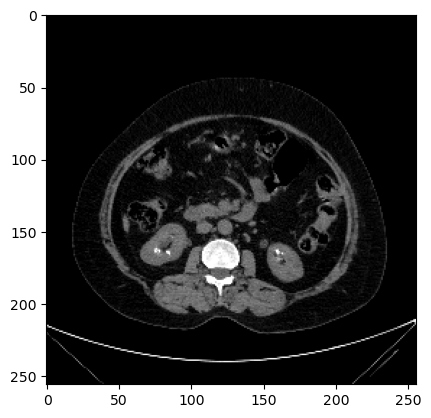

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img("D:/CAPSTONE PROJECT/KIDNEY DATASET/Train/Stone/Stone- (439).jpg", target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)

1/1 [==============================] - 0s 188ms/step
[[1.0000000e+00 3.3748471e-31 1.3181773e-13]]
0


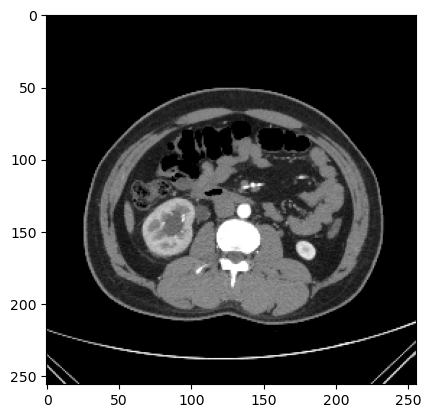

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img("D:/CAPSTONE PROJECT/KIDNEY DATASET/Test/Normal/Normal- (829).jpg", target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save("D:/CAPSTONE PROJECT/KIDNEY DATASET/kidney_vgg19.h5")
           

C:\Users\Bhargavi\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


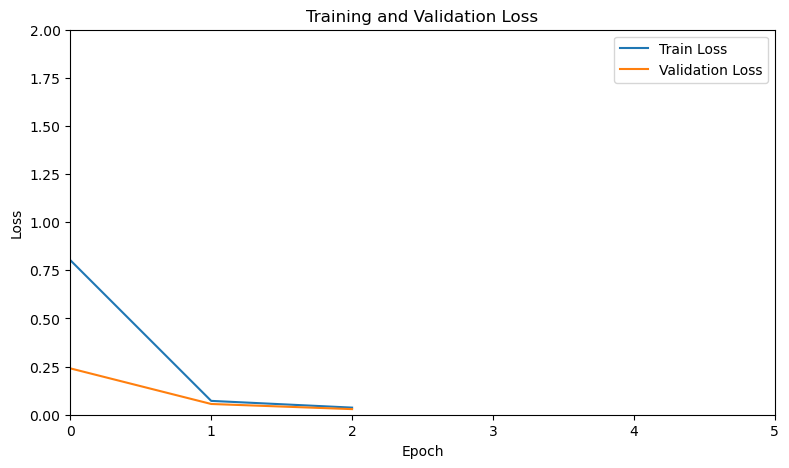

In [23]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Validation Loss")
plt.xlim(0, 5)  # Adjust the x-axis limits as needed
plt.ylim(0.0, 2.0)  # Adjust the y-axis limits as needed
plt.legend()
plt.show()


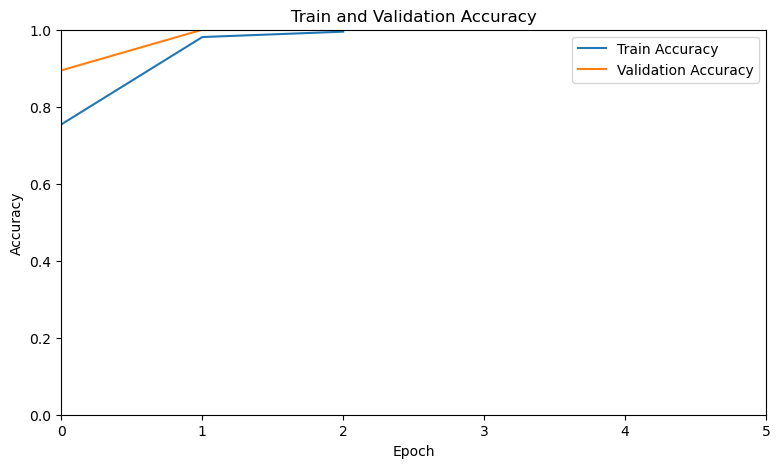

In [24]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)  # Changed subplot position to (1, 2, 2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 5)  # Adjust the x-axis limits as needed
plt.ylim(0, 1.0)  # Adjust the y-axis limits as needed
plt.legend()
plt.show()


In [30]:
from tensorflow.keras.models import load_model
model=load_model("D:/CAPSTONE PROJECT/KIDNEY DATASET/kidney_vgg19.h5")